<a href="https://colab.research.google.com/github/Jeyxnth/rupee-forgery-detection-deep-learning/blob/main/FiveHundred_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Dataset"


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)


In [ ]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [ ]:
CLASSES = ['Fake', 'Real']

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "/Training",
    classes=CLASSES,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    DATASET_PATH + "/Validation",
    classes=CLASSES,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 173 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [ ]:
print("Train classes:", train_generator.class_indices)
print("Val classes:", val_generator.class_indices)


Train classes: {'Fake': 0, 'Real': 1}
Val classes: {'Fake': 0, 'Real': 1}


In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
class_weight = {
    0: 1.0,   # fake
    1: 1.2    # real
}


In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weight,
    callbacks=[early_stop]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - accuracy: 0.4824 - loss: 0.9638 - val_accuracy: 0.5294 - val_loss: 0.6856
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5844 - loss: 0.7431 - val_accuracy: 0.6471 - val_loss: 0.6215
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7052 - loss: 0.6725 - val_accuracy: 0.8039 - val_loss: 0.5828
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7007 - loss: 0.6304 - val_accuracy: 0.8235 - val_loss: 0.5467
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6824 - loss: 0.6152 - val_accuracy: 0.8431 - val_loss: 0.4984
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8067 - loss: 0.5194 - val_accuracy: 0.8235 - val_loss: 0.4738
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7969 - loss: 0.4900 - val_accuracy: 0.8627 - val_loss: 0.4628
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7849 - loss: 0.5084 - val_accuracy: 0.8627 - val_loss:

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight,
    callbacks=[early_stop]
)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7959 - loss: 0.5240 - val_accuracy: 0.8824 - val_loss: 0.3713
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7731 - loss: 0.5094 - val_accuracy: 0.8627 - val_loss: 0.3716
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8223 - loss: 0.4659 - val_accuracy: 0.8627 - val_loss: 0.3734
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9046 - loss: 0.3325 - val_accuracy: 0.8627 - val_loss: 0.3743
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8628 - loss: 0.3783 - val_accuracy: 0.8627 - val_loss: 0.3741
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8589 - loss: 0.3822 - val_accuracy: 0.8431 - val_loss: 0.3735


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - accuracy: 0.8592 - loss: 0.4506
Validation Accuracy: 0.8823529481887817


In [ ]:
model.save("fake_real_500_mobilenetv2.h5")


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

val_preds = model.predict(val_generator)
val_preds = (val_preds > 0.5).astype(int)

print(confusion_matrix(val_generator.classes, val_preds))
print(classification_report(
    val_generator.classes,
    val_preds,
    target_names=['fake', 'real']
))


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 836ms/step
[[21  5]
 [ 1 24]]
              precision    recall  f1-score   support

        fake       0.95      0.81      0.88        26
        real       0.83      0.96      0.89        25

    accuracy                           0.88        51
   macro avg       0.89      0.88      0.88        51
weighted avg       0.89      0.88      0.88        51



In [ ]:
import matplotlib.pyplot as plt

# Combine history objects
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs = range(1, len(acc) + 1)


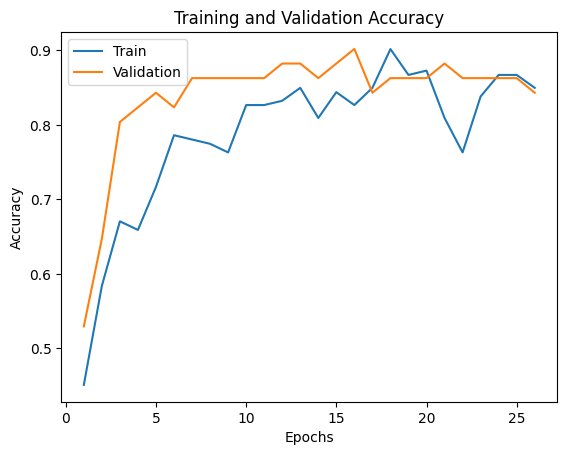

In [ ]:
plt.figure()
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


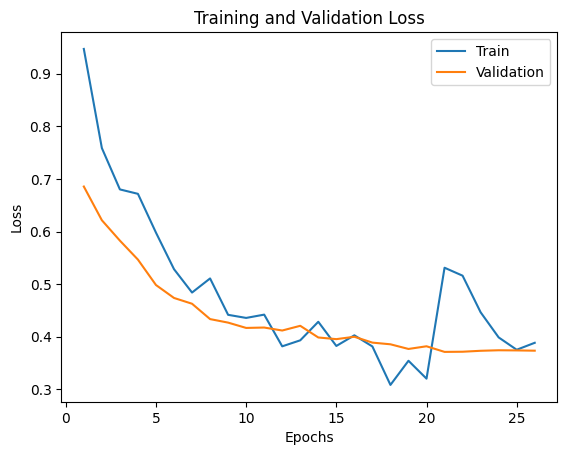

In [ ]:
plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Train', 'Validation'])
plt.show()
